In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

my_data = pd.read_csv('polynomial_train.csv') #read the data

In [2]:
#1)Bringing dataset in desired form and defining ultravariables
a = my_data.iloc[:,1]
A=a.to_numpy()

p = my_data.iloc[:,2]
B=p.to_numpy()

c = my_data.iloc[:,3]
C=c.to_numpy()

y = my_data.iloc[:,4]
Y=y.to_numpy()

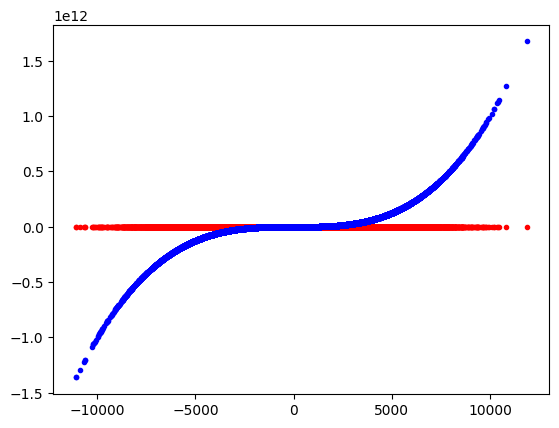

In [3]:
plt.scatter(A,Y, marker='.', c='r')
plt.scatter(A,A*A*A, marker='.', c='b')

plt.show()

In [4]:
 my_data['label']= A*A
my_data['B2']= B*B
my_data['C2']= C*C
my_data['AB']= A*B
my_data['BC']= B*C
my_data['CA']= C*A
my_data['A3']= A**3
my_data['B3']= B**3
my_data['C3']= C**3
my_data['A2B']= A*A*B
my_data['B2C']= B*B*C
my_data['C2A']= C*C*A
my_data['label1']=Y
print(my_data)

       Unnamed: 0            A            B           C         label  \
0               0 -1113.924581   952.105404 -276.045881  1.240828e+06   
1               1 -2229.480228  1111.488568  -93.454107  4.970582e+06   
2               2  2717.257713    53.431237 -179.228591  7.383489e+06   
3               3 -1638.783965  -632.919447 -106.170237  2.685613e+06   
4               4  5173.934338  -721.895577  -75.074840  2.676960e+07   
...           ...          ...          ...         ...           ...   
49995       49995  -401.109554   205.180269 -123.837422  1.608889e+05   
49996       49996   832.536891  -723.312711 -128.736597  6.931177e+05   
49997       49997  -533.446993  1171.457335 -130.840925  2.845657e+05   
49998       49998  1810.499103  -424.111696 -128.334986  3.277907e+06   
49999       49999  -861.910217   257.295992 -176.122871  7.428892e+05   

                 B2            C2            AB             BC             CA  \
0      9.065047e+05  76201.328341 -1.06057

In [5]:
#1)Bringing dataset in desired form and defining ultravariables
x = my_data.iloc[:,1:16]
X_train=x.to_numpy()
Y = my_data.iloc[:,16]
y_train=Y.to_numpy()
w_init=np.zeros(15)
b_init=0.0
print(X_train, y_train)

[[-1.11392458e+03  9.52105404e+02 -2.76045881e+02 ...  1.18139902e+09
  -2.50236889e+08 -8.48825328e+07]
 [-2.22948023e+03  1.11148857e+03 -9.34541072e+01 ...  5.52474516e+09
  -1.15453843e+08 -1.94715449e+07]
 [ 2.71725771e+03  5.34312371e+01 -1.79228591e+02 ...  3.94508977e+08
  -5.11679183e+05  8.72861646e+07]
 ...
 [-5.33446993e+02  1.17145734e+03 -1.30840925e+02 ...  3.33356570e+08
  -1.79554609e+08 -9.13226450e+06]
 [ 1.81049910e+03 -4.24111696e+02 -1.28334986e+02 ... -1.39019870e+09
  -2.30837076e+07  2.98186822e+07]
 [-8.61910217e+02  2.57295992e+02 -1.76122871e+02 ...  1.91142419e+08
  -1.16595503e+07 -2.67358221e+07]] [ -1294.28891782 -27146.87008356  64743.00171817 ...   -285.70796526
   8161.59530383   -255.16713134]


In [6]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [7]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
X_n=np.array(X_norm)

#Y_n, X_mu, X_sigma = zscore_normalize_features(y_train)
Y_n=y_train
print(X_n)

[[-0.41384769  0.98132788 -1.77549966 ... -0.0871772  -1.18440351
  -0.86212377]
 [-0.80507801  1.20523369  0.78992095 ...  0.32831469 -0.21718762
  -0.21431281]
 [ 0.92976497 -0.28115405 -0.41521346 ... -0.16245244  0.60764823
   0.84298379]
 ...
 [-0.21027162  1.28947944  0.2646349  ... -0.16830238 -0.67718078
  -0.11191565]
 [ 0.6117607  -0.95201936  0.29984342 ... -0.33318061  0.44566921
   0.27384294]
 [-0.32546513  0.00524071 -0.37157799 ... -0.18190683  0.52765005
  -0.28625605]]


In [8]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                         
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [9]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_n, Y_n, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 3337943820214.536


In [10]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b ) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [11]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_n, Y_n, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -4760.874138088149
dj_dw at initial w,b: 
 [-1320793.0825778    -17665.95502085   -20397.91344208    44659.60134781
    -3986.7048938     23369.71080436  -473167.4180642      4045.17766711
  1194142.24037651 -2317143.68366398   -10487.60173891   -24602.19450799
   -75980.98385054    -4400.151238   -1036129.41828349]


In [12]:
 def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [13]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 600
alpha = 0.5
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_n, Y_n, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)


Iteration    0: Cost 2207199810895.94   
Iteration   60: Cost 347846344297.45   
Iteration  120: Cost 347651663952.33   
Iteration  180: Cost 347566035870.03   
Iteration  240: Cost 347524613349.15   
Iteration  300: Cost 347504485377.07   
Iteration  360: Cost 347494637319.21   
Iteration  420: Cost 347489768254.41   
Iteration  480: Cost 347487323098.49   
Iteration  540: Cost 347486067289.15   


In [14]:
y_final=[]
iter=[]
m=len(X_n)
for i in range(m):
  pred=np.dot(X_n[i], w_final)+b_final
  y_final.append(pred)
  iter.append(i)
#print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
#m,_ = X_train.shape
#for i in range(m):
 #   print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

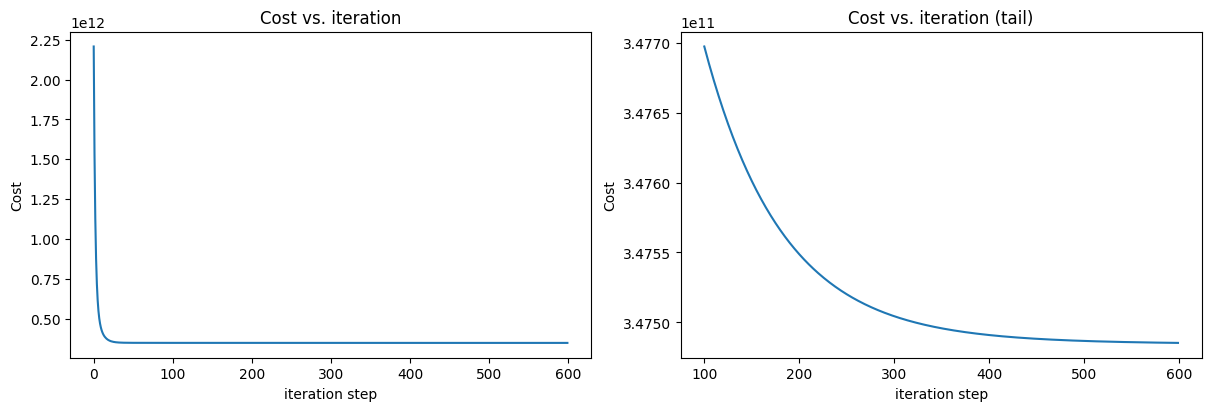

In [15]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [16]:
print(len(X_n), len(Y_n))

50000 50000


In [17]:
print(y_final)

[377814.9906318061, 576055.0553422575, -461893.1235586808, 595445.5346177892, 2429967.391369391, 7715.54198199056, 519361.1602866179, 324689.27112577815, 64910.09027269756, -545290.3540489431, -150066.63855045562, 592645.7385956981, 916716.5686470969, 533132.6358695768, -3215759.8533648583, -284168.1339079949, -514604.6427048437, -368688.65732065693, 585987.926167521, -497831.9182337082, 1090036.4037441902, -543639.0924811255, -169685.31412012212, -8562.916917890723, 621996.516050075, -483807.08873885445, 547979.4319816247, -526844.41539592, -6662621.697322282, -258559.51315218932, -615266.2159330868, 194754.80004475574, 538982.4554081596, 470961.538368315, 647118.9252929548, 589366.2396100091, 505386.1421850474, -914712.6308362801, 537331.6264400303, -341534.2850262572, 574284.1745201093, 9431180.912090832, -409883.4595920572, 287561.6510980691, -281920.5684758864, -566737.4486816972, -268140.47079244157, 407248.5440569588, 363734.9749170953, 263546.67656622006, -501936.9084783826, 69

ValueError: ignored

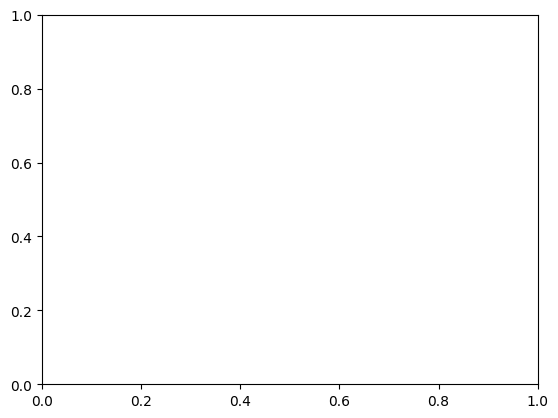

In [31]:
#Plotting predicted value of y and original value of y for every example
plt.scatter(X_n.transpose()[0]**2,Y_n, marker='x', c='r')
plt.scatter(X_n.transpose()[0]**2,y_final, marker='.', c='b')
plt.show()

#Final prediction

In [19]:
my_data = pd.read_csv('polynomial_test_data.csv') #read the data

In [20]:
my_data

,ids,A,B,C
0,78886,-961.622191,789.966580,-43.660479
1,35987,3460.005131,786.092527,-144.096657
2,63576,1648.281427,241.985600,-267.040826
3,86537,-5361.100419,1062.669779,-199.007043
4,45235,-2303.208688,-248.185768,-317.468950
...,...,...,...,...
19995,42763,-1941.831479,284.320247,-88.712478
19996,52748,-993.524028,535.348652,-97.151458
19997,42159,665.127361,683.355125,-184.768610
19998,22095,-80.508468,-24.409192,-153.713418


In [21]:
#1)Bringing dataset in desired form and defining ultravariables
a = my_data.iloc[:,1]
A=a.to_numpy()

p = my_data.iloc[:,2]
B=p.to_numpy()

c = my_data.iloc[:,3]
C=c.to_numpy()

my_data['A2']= A*A
my_data['B2']= B*B
my_data['C2']= C*C
my_data['AB']= A*B
my_data['BC']= B*C
my_data['CA']= C*A
my_data['A3']= A**3
my_data['B3']= B**3
my_data['C3']= C**3
my_data['A2B']= A*A*B
my_data['B2C']= B*B*C
my_data['C2A']= C*C*A
print(my_data)

#1)Bringing dataset in desired form and defining ultravariables
x = my_data.iloc[:,1:16]
X_train=x.to_numpy()


X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
X_n=np.array(X_norm)


y_final=[]
iter=[]
m=len(X_n)
for i in range(m):
  pred=np.dot(X_n[i], w_final)+b_final
  y_final.append(pred)
  iter.append(i)

         ids            A            B           C            A2  \
0      78886  -961.622191   789.966580  -43.660479  9.247172e+05   
1      35987  3460.005131   786.092527 -144.096657  1.197164e+07   
2      63576  1648.281427   241.985600 -267.040826  2.716832e+06   
3      86537 -5361.100419  1062.669779 -199.007043  2.874140e+07   
4      45235 -2303.208688  -248.185768 -317.468950  5.304770e+06   
...      ...          ...          ...         ...           ...   
19995  42763 -1941.831479   284.320247  -88.712478  3.770709e+06   
19996  52748  -993.524028   535.348652  -97.151458  9.870900e+05   
19997  42159   665.127361   683.355125 -184.768610  4.423944e+05   
19998  22095   -80.508468   -24.409192 -153.713418  6.481613e+03   
19999  80712 -2997.298907   778.622097  -59.340165  8.983801e+06   

                 B2             C2            AB             BC            CA  \
0      6.240472e+05    1906.237411 -7.596494e+05  -34490.319146  4.198489e+04   
1      6.179415e+05  

In [22]:
print(y_final)

[407581.9890814296, 5895.74645724083, -521781.2963346835, -3093622.5541967703, 445320.1151020209, -452772.49354774074, 88682.94415082695, -557520.2636308155, 55863.02693065133, -459090.79381555336, 16950.5063254993, -173942.16536830686, -556009.2341215814, 1996721.868017417, 588849.1603287656, 7530033.095369409, -491766.36126013176, -250142.18361030146, 757932.9766207086, 540767.0086819434, 189926.62811785543, -12950571.730902672, 210074.09534375314, -126598.94351687629, 266049.182407146, -404196.9360528581, 433490.19339129183, 381290.8323297848, -1900230.2300442306, 1452859.9908910648, 50094.02622131217, -546287.580827126, -184938.0095331857, -1040873.5720562532, -224487.75447399513, -518227.0926797557, 1318847.748589419, -547622.6815056893, 193062.86104622908, -3810535.23334551, -562613.6424987979, 855229.432001337, 443980.41795238573, -1092269.2233075888, -1931258.1319770957, 569704.487601859, -2312281.407957659, -538109.8342612644, -514609.2090530408, -561357.150631519, 321234.7937

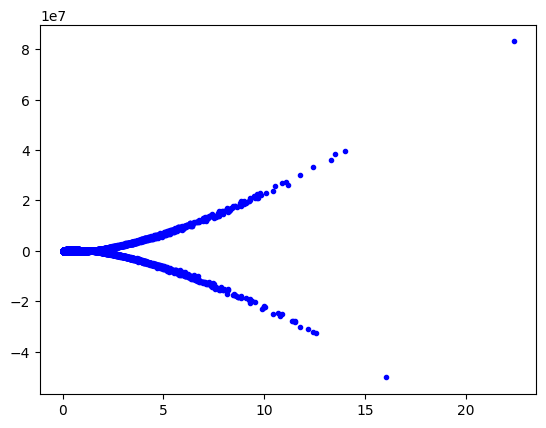

In [30]:
plt.scatter(X_n.transpose()[0]**2,y_final, marker='.', c='b')
plt.show()

In [24]:

from numpy import asarray
from numpy import savetxt
savetxt('polynomial_test_data.csv', y_final, delimiter=',', header='Labels')